In [2]:
import pandas as pd
import numpy as np
import os
import glob
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import geopandas as gpd
from shapely.geometry import Point


/tmp/ipykernel_142098/3832831444.py:1: DtypeWarning: Columns (6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../resources/processed/all_eventsBS_PS53550.txt', sep='\t')


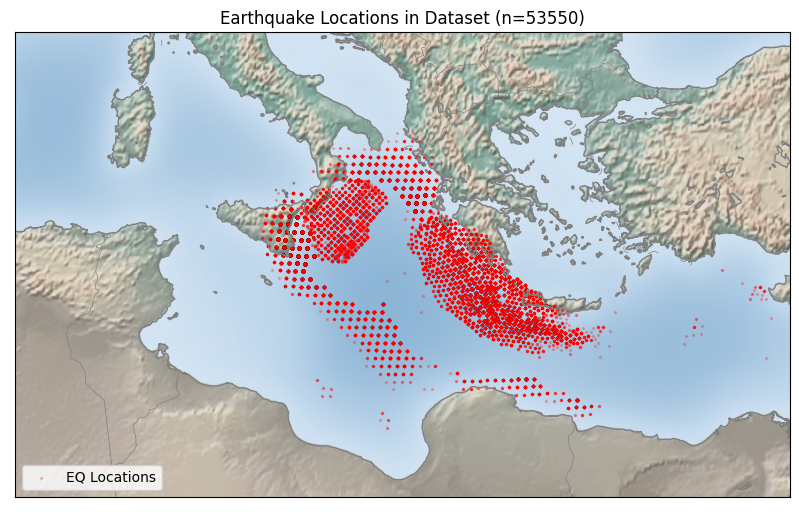

In [20]:
df = pd.read_csv('../resources/processed/all_eventsBS_PS53550.txt', sep='\t')
latmean = df['lat'].mean()
lonmean = df['lon'].mean()


# 1. Draw the map background
fig = plt.figure(figsize=(10, 10))
m = Basemap(llcrnrlon=10, llcrnrlat=25, urcrnrlon=40, urcrnrlat=45)
m = Basemap(projection='lcc', resolution='h', 
            lat_0=latmean, lon_0=lonmean,
            width=2.5E6, height=1.5E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(df['lon'], df['lat'], latlon=True,s=2,
          alpha=0.2, label='EQ Locations',color = 'red')
plt.title('Earthquake Locations in Dataset (n=53550)')
plt.legend(facecolor='white',loc='lower left')
plt.show()

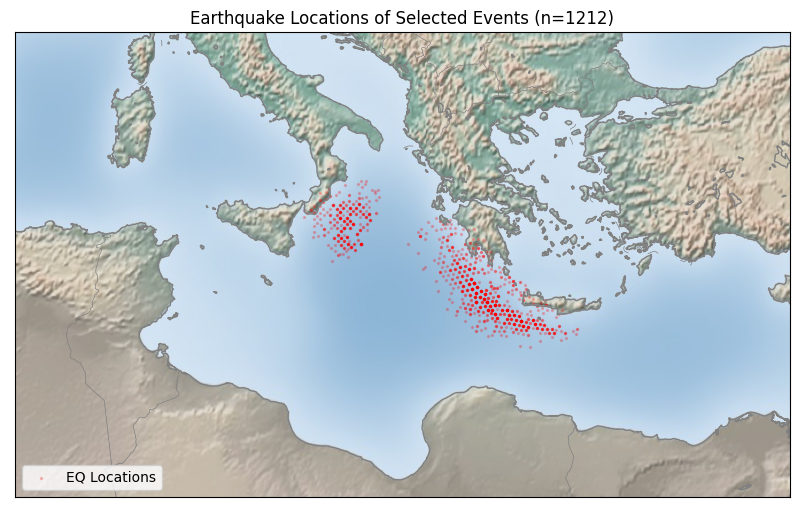

In [23]:
df_sel = pd.read_csv('../data/events/sample_events1212.txt', sep='\t',header = None)
df_sel.columns = ['ID']
df_sel = df_sel.merge(df)

# 1. Draw the map background
fig = plt.figure(figsize=(10, 10))
m = Basemap(llcrnrlon=10, llcrnrlat=25, urcrnrlon=40, urcrnrlat=45)
m = Basemap(projection='lcc', resolution='h', 
            lat_0=latmean, lon_0=lonmean,
            width=2.5E6, height=1.5E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(df_sel['lon'], df_sel['lat'], latlon=True,s=2,
          alpha=0.2, label='EQ Locations',color = 'red')
plt.title('Earthquake Locations of Selected Events (n=1212)')
plt.legend(facecolor='white',loc='lower left')
plt.show()

In [ ]:
import numpy as np
from netCDF4 import Dataset
# from scipy.io import netcdf
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

when = 0 # improve this variable later so that user input can be date/ time

filename = 'some_filepath' # input the complete filepath here
# open the file at the address 'filename' for reading:
fopen = Dataset(filename, 'r') # <-- turn on if using netCDF4
# fopen = netcdf.netcdf_file(filename, 'r') <-- turn on if using scipy.io

# now set variables x, y and 'data':
x = fopen.variables['lon_var'][:] # this is a 1D longitude array
y = fopen.variables['lat_var'][:] # this is a 1D latitude array 
data = fopen.variables['data_var'][:] 
# this is a 3D array with a value saved at each point in 2D space and time
# reduce data to a 2D array for a specific time:
data_when = data[when,:,:]

#close the file at the address
fopen.close()

# create a basemap to plot onto:
m = Basemap(width=10000000, height=7000000,\
        resolution='l', projection='stere',\
        lat_ts=40, lat_0=50, lon_0=0)
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81,20))
m.drawmeridians(np.arange(-180.,181,20))
# 
#   add other basemap drawing options here 

# convert 1D matrices into 2D fill matrices for processing:
xx, yy = np.meshgrid(x, y)
xx, yy = m(xx, yy)
plt.contourf(xx, yy, data_when)

plt.show()